In [1]:
import sys
import os
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
home=os.getcwd()
sys.path.append(home+'/Functions')
from ChargeDataSet import *
from MS_L_IDs import *
from ShowDF import *
from AllMS2Data import *
from All_ms2_spectra import *
from ms2_SpectralRedundancy import *
from feat_ms2_Gauss import *
from PlotSpec import *

In [2]:
from SamplesNames_from_List import *
SamplesInfDF=SamplesNames_from_List(SamplesInfName='Samples_to_Analyze.xls')

In [3]:
from Features_ms2_SamplesAligment import *
ResultsFolderName='Results-20241130'
AlignedSamplesDF,AlignedSamples_RT_DF=Features_ms2_SamplesAligment(ResultsFolderName=ResultsFolderName,mz_min=210,mz_max=260,RT_min=0,RT_max=2000,RT_tol=30,mz_Tol=0,min_Int_Frac=1,cos_tol=0.7,ToReplace='.mzML.xlsx',ms2Folder='ms2_spectra',ToAdd='mzML',saveAlignedTable=True)
   

In [4]:
from RemoveBlankFeatures import *
CarbonSourceFeatures,CarbonSourceFeatures_RT=RemoveBlankFeatures(AlignedSamplesDF,AlignedSamples_RT_DF,SamplesInfDF,AllBlanksAllSamples=True,FeaturesBlankAppear=2,FeaturesEffluentAppear=6,Min_Feat_Blank=3,CarbonSource=['Aniline','Histidine', 'Succinate'],BlankSource=['EffluentClean', 'Influent', 'InfluentClean'])

In [5]:
Carbon=pd.read_excel('Carbon.xlsx',index_col=0)
ShowDF(Carbon)

,mz_(Da),mz_ConfidenceInterval_(Da),RT_(s),min_RT_(s),max_RT_(s),12211,12212,12213,12221,12222,12223,12231,12232,12233,11211,11212,11213,11221,11222,11223,11231,11232,11233,13211,13212,13213,13221,13222,13223,13231,13232,13233
9,210.135,0.00123968,129.801,128.129,139.343,0,0,0,131.289,131.539,130.395,0,0,0,128.129,134.049,128.282,128.748,128.586,129.839,128.738,129.746,128.277,0,0,0,0,0,0,0,0,0
56,213.078,0.0015521,229.282,227.787,233.678,0,0,0,0,0,229.679,229.729,230.462,0,230.4,229.181,228.93,227.787,229.77,228.996,228.762,228.717,228.759,229.492,0,0,0,0,0,0,0,0
75,214.072,0.00136476,95.9243,94.7644,101.098,0,0,0,0,0,0,0,0,0,95.7284,95.4643,95.7284,96.5581,94.7644,97.3022,0,0,0,0,0,0,0,0,0,0,0,0
90,215.075,0.00156122,221.846,220.151,226.135,221.169,221.926,221.298,221.134,221.953,221.109,221.159,221.061,220.812,221.889,222.104,220.151,221.935,223.363,222.566,221.043,225.81,220.876,220.912,220.72,221.334,222.078,221.463,221.425,224.059,0,0
342,230.067,0.00154415,99.5679,93.9588,105.801,0,0,0,0,0,0,0,0,0,94.3818,94.6797,94.9463,100.937,101.405,101.418,0,104.671,0,0,0,0,0,0,0,0,0,0
399,235.094,0.00168584,188.04,187.403,188.793,188.793,187.642,0,188.479,187.606,0,0,187.723,188.774,0,0,0,0,0,0,0,0,0,187.932,0,0,0,0,188.008,0,0,187.403
729,256.144,0.00206633,201.286,200.698,202.078,200.938,201.355,201.811,202.078,0,201.158,200.698,200.964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
740,257.099,0.00207752,127.687,124.057,133.949,0,0,0,127.92,131.776,0,0,0,127.8,0,126.172,124.878,0,0,0,0,0,0,125.43,125.697,0,0,128.48,131.382,126.82,124.293,124.057
787,259.118,0.00217457,175.747,167.909,212.605,0,174.001,186.535,0,0,178.673,169.565,0,0,0,0,0,0,0,0,0,0,0,173.161,173.216,0,170.922,0,0,173.674,174.188,174.322


In [11]:
Set_aniline,Set_histidine,Set_succinate=SetsFeatures(AlignedSamplesDF=Carbon,SamplesInfDF=SamplesInfDF,FeaturesEffluentAppear=6,CarbonSource=['Aniline','Histidine', 'Succinate'])

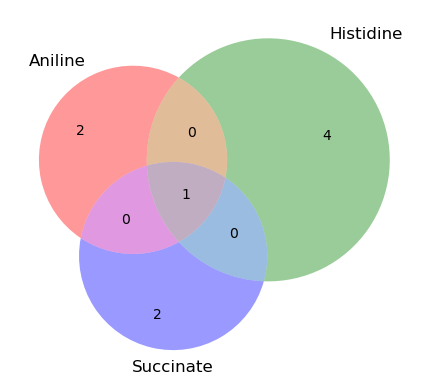

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
VenOb=venn3([Set_aniline,Set_histidine,Set_succinate], ('Aniline','Histidine', 'Succinate'))

In [5]:
ShowDF(CarbonSourceFeatures)

,mz_(Da),mz_std_(Da),mz_ConfidenceInterval_(Da),mz_ConfidenceInterval_(ppm),RT_(s),min_RT_(s),max_RT_(s),12211,12212,12213,12221,12222,12223,12231,12232,12233,11211,11212,11213,11221,11222,11223,11231,11232,11233,13211,13212,13213,13221,13222,13223,13231,13232,13233
9,210.135,0.00144591,0.00123968,5.89947,129.801,128.129,139.343,0,0,0,1030.18,936.788,1186.7,0,0,0,3803.56,3497.23,2175.25,2340.94,3120.98,2282.88,2874.78,1373.57,1720.43,0,0,0,0,0,0,0,0,0
56,213.078,0.00146862,0.0015521,7.2842,229.282,227.787,233.678,0,0,0,0,0,1652.24,2599.68,3106.66,0,1655.91,1750.99,1608.3,4367.16,7394.46,8593.37,2953.27,2073.77,2617.76,4555.88,0,0,0,0,0,0,0,0
75,214.072,0.00148604,0.00136476,6.37525,95.9243,94.7644,101.098,0,0,0,0,0,0,0,0,0,815.374,763.404,1410.81,894.73,306.19,791.94,0,0,0,0,0,0,0,0,0,0,0,0
90,215.075,0.00148261,0.00156122,7.25893,221.846,220.151,226.135,4083.83,3814.16,2452.75,2861.94,3915.15,2388.48,3103.99,2164.45,2875.55,2765.2,3421.62,2043.39,3946.76,3265.25,3806.44,3912.66,2015.44,2141.68,5501.96,5999.57,2901.33,2263.77,1261.24,2425.84,1207.81,0,0
342,230.067,0.00165155,0.00154415,6.71174,99.5679,93.9588,105.801,0,0,0,0,0,0,0,0,0,1167.34,922.799,1462.62,516.792,932.969,2765.36,0,406.998,0,0,0,0,0,0,0,0,0,0
399,235.094,0.00171661,0.00168584,7.17094,188.04,187.403,188.793,1440.49,3056.86,0,1629.98,2435.71,0,0,2522.18,1277.28,0,0,0,0,0,0,0,0,0,3328.52,0,0,0,0,3435.18,0,0,2068.34
729,256.144,0.00193732,0.00206633,8.06705,201.286,200.698,202.078,2453.11,2797.47,2783.04,1248.83,0,3341.69,2605.9,3697.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
740,257.099,0.00194802,0.00207752,8.08062,127.687,124.057,133.949,0,0,0,1252.08,1750.54,0,0,0,762.042,0,956.767,731.489,0,0,0,0,0,0,1004.43,1250.33,0,0,627.791,860.138,1182.64,1172.2,2125.53
787,259.118,0.00200331,0.00217457,8.3922,175.747,167.909,212.605,0,29633.3,3108.06,0,0,1975.69,2858.76,0,0,0,0,0,0,0,0,0,0,0,46148.2,24380.3,0,2447,0,0,158242,3159.03,4688.09


In [6]:
ShowDF(CarbonSourceFeatures_RT)

,mz_(Da),mz_std_(Da),mz_ConfidenceInterval_(Da),mz_ConfidenceInterval_(ppm),RT_(s),min_RT_(s),max_RT_(s),12211,12212,12213,12221,12222,12223,12231,12232,12233,11211,11212,11213,11221,11222,11223,11231,11232,11233,13211,13212,13213,13221,13222,13223,13231,13232,13233
9,210.135,0.00144591,0.00123968,5.89947,129.801,128.129,139.343,0,0,0,131.289,131.539,130.395,0,0,0,128.129,134.049,128.282,128.748,128.586,129.839,128.738,129.746,128.277,0,0,0,0,0,0,0,0,0
56,213.078,0.00146862,0.0015521,7.2842,229.282,227.787,233.678,0,0,0,0,0,229.679,229.729,230.462,0,230.4,229.181,228.93,227.787,229.77,228.996,228.762,228.717,228.759,229.492,0,0,0,0,0,0,0,0
75,214.072,0.00148604,0.00136476,6.37525,95.9243,94.7644,101.098,0,0,0,0,0,0,0,0,0,95.7284,95.4643,95.7284,96.5581,94.7644,97.3022,0,0,0,0,0,0,0,0,0,0,0,0
90,215.075,0.00148261,0.00156122,7.25893,221.846,220.151,226.135,221.169,221.926,221.298,221.134,221.953,221.109,221.159,221.061,220.812,221.889,222.104,220.151,221.935,223.363,222.566,221.043,225.81,220.876,220.912,220.72,221.334,222.078,221.463,221.425,224.059,0,0
342,230.067,0.00165155,0.00154415,6.71174,99.5679,93.9588,105.801,0,0,0,0,0,0,0,0,0,94.3818,94.6797,94.9463,100.937,101.405,101.418,0,104.671,0,0,0,0,0,0,0,0,0,0
399,235.094,0.00171661,0.00168584,7.17094,188.04,187.403,188.793,188.793,187.642,0,188.479,187.606,0,0,187.723,188.774,0,0,0,0,0,0,0,0,0,187.932,0,0,0,0,188.008,0,0,187.403
729,256.144,0.00193732,0.00206633,8.06705,201.286,200.698,202.078,200.938,201.355,201.811,202.078,0,201.158,200.698,200.964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
740,257.099,0.00194802,0.00207752,8.08062,127.687,124.057,133.949,0,0,0,127.92,131.776,0,0,0,127.8,0,126.172,124.878,0,0,0,0,0,0,125.43,125.697,0,0,128.48,131.382,126.82,124.293,124.057
787,259.118,0.00200331,0.00217457,8.3922,175.747,167.909,212.605,0,174.001,186.535,0,0,178.673,169.565,0,0,0,0,0,0,0,0,0,0,0,173.161,173.216,0,170.922,0,0,173.674,174.188,174.322


In [137]:
CarbonSourceFeatures,CarbonSourceFeatures_RT=RefineFeaturesTable_withChromatogram(CarbonSourceFeatures,CarbonSourceFeatures_RT,ToAdd='.mzML',DataFolder='/home/edwin/Documents/16.02/data',mz_tol=5,RT_tol=5)

In [6]:
ShowDF(CarbonSourceFeatures)

,mz_(Da),mz_std_(Da),mz_ConfidenceInterval_(Da),mz_ConfidenceInterval_(ppm),RT_(s),min_RT_(s),max_RT_(s),12211,12212,12213,12221,12222,12223,12231,12232,12233,11211,11212,11213,11221,11222,11223,11231,11232,11233,13211,13212,13213,13221,13222,13223,13231,13232,13233
75,214.072,0.00148604,0.00136476,6.37525,95.9243,94.7644,101.098,0,0,0,0,0,0,0,0,0,1.7626e+06,2.53147e+06,3.95191e+06,1.30684e+06,825527,1.35994e+06,0,0,0,0,0,0,0,0,0,0,0,0
342,230.067,0.00165155,0.00154415,6.71174,99.5679,93.9588,105.801,0,0,0,0,0,0,0,0,0,1.84259e+06,3.34382e+06,5.36304e+06,2.58824e+06,1.53597e+06,2.98575e+06,243375,294170,145739,0,0,0,0,0,0,0,0,0
740,257.099,0.00194802,0.00207752,8.08062,127.687,124.057,133.949,313473,1.56062e+06,1.4558e+06,3.46279e+06,3.62196e+06,1.08666e+06,0,364533,2.51895e+06,1.67695e+06,542574,181820,702361,1.21247e+06,1.53806e+06,709312,385619,246836,2.40671e+06,447720,317486,941288,1.25937e+06,1.95656e+06,628742,3.20573e+06,4.35953e+06
9,210.135,0.00144591,0.00123968,5.89947,129.801,128.129,139.343,116389,60983.9,550894,2.0183e+06,1.52937e+06,4.07145e+06,0,134505,291548,8.52164e+06,1.65167e+07,1.18904e+07,6.68005e+06,5.27737e+06,6.15662e+06,8.04186e+06,3.13585e+06,3.24898e+06,0,0,87137,73628.3,0,0,60741.5,81569.4,45675.7
787,259.118,0.00200331,0.00217457,8.3922,175.747,167.909,212.605,5.2927e+07,2.81776e+07,1.80801e+06,782711,142705,7.2066e+06,8.62526e+06,8.52446e+06,306343,322001,521176,505094,1.34427e+07,810542,1.454e+06,1.75544e+06,327280,148942,6.45417e+07,4.63375e+07,1.71891e+06,5.16628e+06,1.41278e+06,9.37356e+06,2.07315e+08,4.88137e+06,6.92941e+06
399,235.094,0.00171661,0.00168584,7.17094,188.04,187.403,188.793,1.8923e+06,5.04691e+06,1.4241e+06,2.0328e+06,5.5585e+06,734937,855137,3.38887e+06,1.95058e+06,412599,893910,500035,779934,219574,0,533935,315612,442922,4.36783e+06,575560,787859,599091,599086,3.79492e+06,1.06544e+06,1.61365e+06,3.16674e+06
729,256.144,0.00193732,0.00206633,8.06705,201.286,200.698,202.078,1.25452e+06,3.06962e+06,2.73089e+06,1.17019e+06,196184,2.79381e+06,4.28309e+06,3.28778e+06,755946,0,0,0,551451,948545,1.1386e+06,0,0,0,1.91198e+06,1.47512e+06,1.23619e+06,150226,0,535093,402569,763650,686192
90,215.075,0.00148261,0.00156122,7.25893,221.846,220.151,226.135,5.88017e+06,1.68937e+06,4.09913e+06,4.95123e+06,5.34772e+06,4.95887e+06,7.85023e+06,5.13146e+06,6.68152e+06,4.48125e+06,2.60793e+06,5.0051e+06,1.46336e+06,868804,1.79125e+06,6.08205e+06,5.82795e+06,4.55857e+06,1.6156e+06,1.35457e+06,2.64373e+06,3.10604e+06,1.87494e+06,4.21078e+06,2.56015e+06,242697,720924
56,213.078,0.00146862,0.0015521,7.2842,229.282,227.787,233.678,236528,1.20264e+06,0,0,614769,2.87083e+06,1.54903e+06,1.39715e+06,0,1.51726e+06,2.98744e+06,2.04092e+06,1.06227e+07,1.50532e+06,3.82095e+06,3.71737e+06,2.82753e+06,1.83488e+06,6.14695e+06,486436,304650,255476,399331,1.35903e+06,0,0,113305


In [146]:
ShowDF(CarbonSourceFeatures)

,mz_(Da),mz_std_(Da),mz_ConfidenceInterval_(Da),mz_ConfidenceInterval_(ppm),RT_(s),min_RT_(s),max_RT_(s),12211,12212,12213,12221,12222,12223,12231,12232,12233,11211,11212,11213,11221,11222,11223,11231,11232,11233,13211,13212,13213,13221,13222,13223,13231,13232,13233
75,214.072,0.00148604,0.00136476,6.37525,95.9243,94.7644,101.098,0,0,0,0,0,0,0,0,0,815.374,763.404,1410.81,894.73,306.19,791.94,0,0,0,0,0,0,0,0,0,0,0,0
342,230.067,0.00165155,0.00154415,6.71174,99.5679,93.9588,105.801,0,0,0,0,0,0,0,0,0,1167.34,922.799,1462.62,516.792,932.969,2765.36,243182,251712,0,0,0,0,0,0,0,0,0,0
740,257.099,0.00194802,0.00207752,8.08062,127.687,124.057,133.949,0,0,0,1252.08,1750.54,0,0,0,762.042,0,956.767,731.489,0,0,0,594146,176556,0,1004.43,1250.33,0,0,627.791,860.138,1182.64,1172.2,2125.53
9,210.135,0.00144591,0.00123968,5.89947,129.801,128.129,139.343,0,0,0,1030.18,936.788,1186.7,0,0,0,3803.56,3497.23,2175.25,2340.94,3120.98,2282.88,8.44616e+06,3.44414e+06,1720.43,0,0,0,0,0,0,0,0,0
787,259.118,0.00200331,0.00217457,8.3922,175.747,167.909,212.605,0,29633.3,3108.06,0,0,1975.69,2858.76,0,0,0,0,0,0,0,0,1.69979e+06,225920,0,46148.2,24380.3,0,2447,0,0,158242,3159.03,4688.09
399,235.094,0.00171661,0.00168584,7.17094,188.04,187.403,188.793,1440.49,3056.86,0,1629.98,2435.71,0,0,2522.18,1277.28,0,0,0,0,0,0,406413,1.84478e+06,0,3328.52,0,0,0,0,3435.18,0,0,2068.34
729,256.144,0.00193732,0.00206633,8.06705,201.286,200.698,202.078,2453.11,2797.47,2783.04,1248.83,0,3341.69,2605.9,3697.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90,215.075,0.00148261,0.00156122,7.25893,221.846,220.151,226.135,4083.83,3814.16,2452.75,2861.94,3915.15,2388.48,3103.99,2164.45,2875.55,2765.2,3421.62,2043.39,3946.76,3265.25,3806.44,6.98064e+06,5.80974e+06,2141.68,5501.96,5999.57,2901.33,2263.77,1261.24,2425.84,1207.81,0,0
56,213.078,0.00146862,0.0015521,7.2842,229.282,227.787,233.678,0,0,0,0,0,1652.24,2599.68,3106.66,0,1655.91,1750.99,1608.3,4367.16,7394.46,8593.37,3.30163e+06,2.76955e+06,2617.76,4555.88,0,0,0,0,0,0,0,0


In [5]:
DF=pd.read_excel('AlignedFeatures-2024-11-02.xlsx',index_col=0)

In [6]:
DF

,mz_(Da),RT_(s),11011,11012,11013,11111,11121,11131,11211,11212,...,21121_noSPE,21131_noSPE,21211_noSPE,21221_noSPE,MeOH,MeOH_1,MeOH_2,MeOH_3,MeOH_4,blank
0,100.075480,84.159694,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,73.305742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,100.075515,86.984899,3447.677291,6295.631089,937.857238,0.000000,0.0,0.000000,134.380048,106.707900,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100.075547,209.708244,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100.111882,111.629851,1758.083272,1241.071171,884.572094,136.263996,0.0,153.182525,267.635136,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,100.111886,232.825308,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5173,599.266536,230.882845,72528.980953,184177.824816,98195.495524,0.000000,0.0,0.000000,9790.535966,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5174,599.323364,164.164306,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5175,599.323924,150.056304,63613.323785,43754.278373,25120.557091,0.000000,0.0,0.000000,12611.111853,15705.963564,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5176,599.400105,181.309803,42197.336747,47175.785466,90472.473647,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
DF[['mz_(Da)','12011','12311','12212','12112']]

,mz_(Da),12011,12311,12212,12112
0,100.075480,0.000000,0.000000,0.000000,0.000000
1,100.075515,0.000000,0.000000,129.316530,0.000000
2,100.075547,0.000000,0.000000,0.000000,0.000000
3,100.111882,97.599193,376.166500,127.083454,175.456121
4,100.111886,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
5173,599.266536,0.000000,13412.642063,0.000000,0.000000
5174,599.323364,0.000000,0.000000,0.000000,0.000000
5175,599.323924,0.000000,17417.473859,8082.546172,0.000000
5176,599.400105,0.000000,0.000000,0.000000,0.000000


In [14]:
InfC=set(DF['mz_(Da)'][DF['12011']>0])
EffC=set(DF['mz_(Da)'][DF['12311']>0])
Eff=set(DF['mz_(Da)'][DF['12212']>0])
Inf=set(DF['mz_(Da)'][DF['12112']>0])

In [38]:
(309+266+111+145)/len(InfC|EffC|Eff|Inf)*100

52.89624443029918

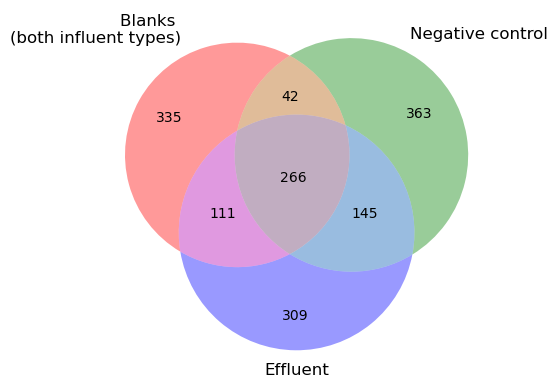

In [39]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
VenOb=venn3([InfC|Inf,EffC,Eff],('Blanks \n(both influent types)','Negative control','Effluent'))